In [1]:
import tensorflow as tf
print(tf.sysconfig.get_build_info())


OrderedDict({'is_cuda_build': False, 'is_rocm_build': False, 'is_tensorrt_build': False, 'msvcp_dll_names': 'msvcp140.dll,msvcp140_1.dll'})


In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]


In [2]:
import tensorflow as tf
print(tf.sysconfig.get_build_info()["cuda_version"])
print(tf.sysconfig.get_build_info()["cudnn_version"])


KeyError: 'cuda_version'

In [1]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 0


# ???

In [ ]:
import tensorflow as tf
import os

# Define dataset directories
train_dir = "C:/Users/marty/Desktop/SUPER REVISED CODE/base/train"
test_dir = "C:/Users/marty/Desktop/SUPER REVISED CODE/base/test"

# Parameters
batch_size = 16  # Reduce batch size for large 1024x1024 images
img_height = 1024
img_width = 1024

# Load datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
)

# Automatically detect number of classes
num_classes = len(train_ds.class_names)
print(f"Detected {num_classes} classes: {train_ds.class_names}")

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

# Model architecture
model = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),  # Normalize pixel values
    
    # 1st Conv Block
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    
    # 2nd Conv Block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    
    # 3rd Conv Block
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),  # More dropout to prevent overfitting
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=2
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.2f}")

# Save the model
model.save("C:/Users/marty/Desktop/SUPER REVISED CODE/model/MODEL1.keras")

print("✅ Model training and saving complete!")


Found 41681 files belonging to 5 classes.
Found 10422 files belonging to 5 classes.
Detected 5 classes: ['Biodegradable', 'Hazardous', 'Recyclable', 'Residual', 'Special']
Epoch 1/2


c:\Users\marty\Desktop\SUPER REVISED CODE\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


   5/2606 ━━━━━━━━━━━━━━━━━━━━ 14:17:56 20s/step - accuracy: 0.3281 - loss: 263.5229

# ABSOLUTE DOWNGRADE

In [2]:
import tensorflow as tf
import os

# Define dataset directories
train_dir = "C:/Users/marty/Desktop/SUPER REVISED CODE/base256/train"
test_dir = "C:/Users/marty/Desktop/SUPER REVISED CODE/base256/test"

# Parameters
batch_size = 32
img_height = 256
img_width = 256
num_classes = 5  # The 5 trash categories

# Function to load and preprocess images
def preprocess_image(image, label):
    image = image / 255.0  # Normalize to [0, 1]
    return image, label

# Create a TensorFlow dataset from the directory
def load_dataset(directory):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory,
        image_size=(img_height, img_width),
        batch_size=batch_size,
        label_mode='int',  # Integer labels (0 to 4)
        shuffle=True
    )
    dataset = dataset.map(preprocess_image)
    return dataset

# Load train and test datasets
train_ds = load_dataset(train_dir)
test_ds = load_dataset(test_dir)

# Create the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer with 5 categories
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=30  # You can increase this for better accuracy
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_ds)
print(f"✅ Test accuracy: {test_acc:.2f}")

# Save the model
model.save("C:/Users/marty/Desktop/SUPER REVISED CODE/model/base256_model.keras")

print("✅ Model training complete. Saved as 'base256_model.keras'.")


Found 41681 files belonging to 5 classes.
Found 10422 files belonging to 5 classes.
Epoch 1/30
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 889s 682ms/step - accuracy: 0.5566 - loss: 1.1255 - val_accuracy: 0.6718 - val_loss: 0.8615
Epoch 2/30
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 836s 642ms/step - accuracy: 0.7402 - loss: 0.6996 - val_accuracy: 0.7349 - val_loss: 0.8623
Epoch 3/30
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 839s 644ms/step - accuracy: 0.8803 - loss: 0.3394 - val_accuracy: 0.7447 - val_loss: 1.2256
Epoch 4/30
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 836s 641ms/step - accuracy: 0.9505 - loss: 0.1472 - val_accuracy: 0.7522 - val_loss: 1.5158
Epoch 5/30
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 840s 644ms/step - accuracy: 0.9725 - loss: 0.0907 - val_accuracy: 0.7529 - val_loss: 1.6224
Epoch 6/30
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 854s 655ms/step - accuracy: 0.9772 - loss: 0.0728 - val_accuracy: 0.7532 - val_loss: 1.8501
Epoch 7/30
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 837s 642ms/step - accuracy: 0.9825 - loss: 0.0623 - val_accuracy: 0.74

In [6]:
import os
from PIL import Image

base256_folder = "base256"

for filename in os.listdir(base256_folder):
    file_path = os.path.join(base256_folder, filename)
    try:
        img = Image.open(file_path)
        img.verify()  # Verify the integrity of the image
    except Exception as e:
        print(f"Corrupt image detected: {filename} -> {e}")
        os.remove(file_path)  # Remove the corrupt image


Corrupt image detected: test -> [Errno 13] Permission denied: 'base256\\test'


PermissionError: [WinError 5] Access is denied: 'base256\\test'

In [3]:
import os
import shutil
import random

# Paths
base256_folder = "base256"
train_folder = os.path.join(base256_folder, "train")
test_folder = os.path.join(base256_folder, "test0")

# Create the test0 folder if it doesn't exist
os.makedirs(test_folder, exist_ok=True)

# Process each subfolder
for subfolder in os.listdir(train_folder):
    subfolder_path = os.path.join(train_folder, subfolder)
    test_subfolder_path = os.path.join(test_folder, subfolder)

    if not os.path.isdir(subfolder_path):  # Skip non-directory files
        continue

    # Create subfolder inside test0
    os.makedirs(test_subfolder_path, exist_ok=True)

    # Get list of all images in the current subfolder
    images = [f for f in os.listdir(subfolder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Select 5% randomly
    num_to_select = max(1, int(0.05 * len(images)))  # Ensure at least 1 image is selected
    selected_images = random.sample(images, num_to_select)

    # Copy images to test0
    for img in selected_images:
        src_path = os.path.join(subfolder_path, img)
        dest_path = os.path.join(test_subfolder_path, img)
        shutil.copy2(src_path, dest_path)
        print(f"📂 Copied {img} -> {test_subfolder_path}")

print("\n✅ Test dataset (5%) successfully created in 'test0'!")


📂 Copied 1139.png -> base256\test0\Biodegradable
📂 Copied 1825.png -> base256\test0\Biodegradable
📂 Copied 8760.png -> base256\test0\Biodegradable
📂 Copied 5431.png -> base256\test0\Biodegradable
📂 Copied 3680.png -> base256\test0\Biodegradable
📂 Copied 11053.png -> base256\test0\Biodegradable
📂 Copied 1211.png -> base256\test0\Biodegradable
📂 Copied 5166.png -> base256\test0\Biodegradable
📂 Copied 1744.png -> base256\test0\Biodegradable
📂 Copied 7827.png -> base256\test0\Biodegradable
📂 Copied 5385.png -> base256\test0\Biodegradable
📂 Copied 5278.png -> base256\test0\Biodegradable
📂 Copied 0186.png -> base256\test0\Biodegradable
📂 Copied 4994.png -> base256\test0\Biodegradable
📂 Copied 11092.png -> base256\test0\Biodegradable
📂 Copied 5922.png -> base256\test0\Biodegradable
📂 Copied 9559.png -> base256\test0\Biodegradable
📂 Copied 10329.png -> base256\test0\Biodegradable
📂 Copied 2685.png -> base256\test0\Biodegradable
📂 Copied 8808.png -> base256\test0\Biodegradable
📂 Copied 8047.png

🔄 Loading model...
✅ Model loaded successfully!
📂 Loading test dataset...
Found 2083 files belonging to 5 classes.

🔬 Evaluating model on test dataset...
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - accuracy: 0.9147 - loss: 93.2482

📊 Test Accuracy: 92.46%
📉 Test Loss: 76.8714
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


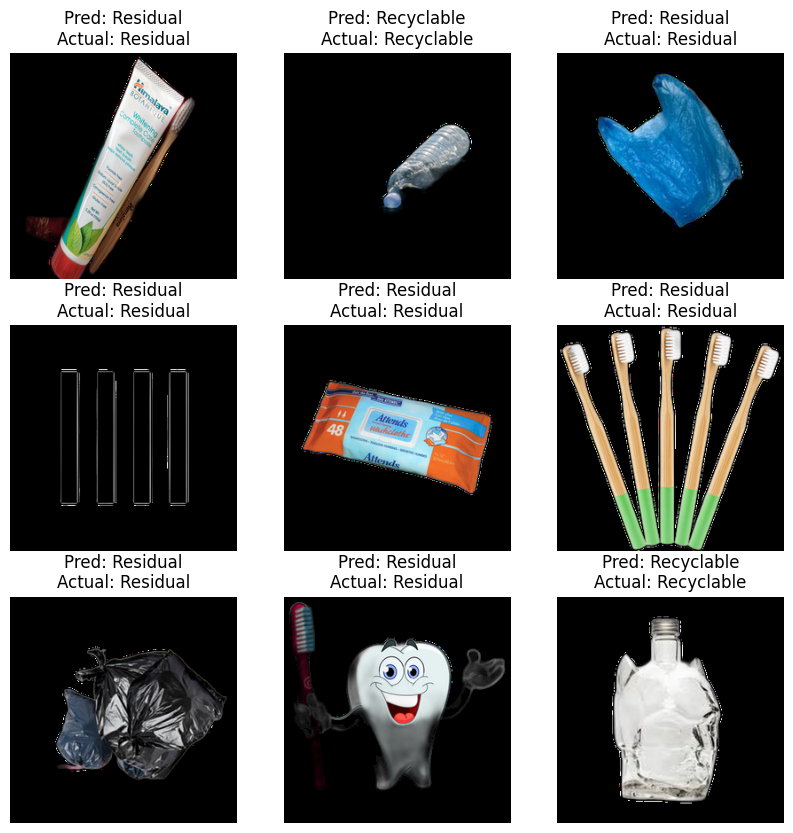


✅ Testing complete!


In [6]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Paths
model_path = r"C:\Users\marty\Desktop\SUPER REVISED CODE\model\base256_model.keras"
test_data_dir = r"C:\Users\marty\Desktop\SUPER REVISED CODE\base256\test0"

# Load trained model
print("🔄 Loading model...")
model = tf.keras.models.load_model(model_path)
print("✅ Model loaded successfully!")

# Load test dataset
print("📂 Loading test dataset...")
test_ds = image_dataset_from_directory(
    test_data_dir,
    image_size=(256, 256),  # Ensure it matches training input size
    batch_size=32,
    shuffle=True
)

# Evaluate model on test dataset
print("\n🔬 Evaluating model on test dataset...")
test_loss, test_accuracy = model.evaluate(test_ds)

# Print results
print(f"\n📊 Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"📉 Test Loss: {test_loss:.4f}")

# Predict and display some results
class_names = test_ds.class_names  # Get class names from dataset
test_images, test_labels = next(iter(test_ds))  # Get a batch

predictions = model.predict(test_images)  # Make predictions
predicted_labels = np.argmax(predictions, axis=1)

# Plot results
plt.figure(figsize=(10, 10))
for i in range(9):  # Show 9 sample images
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i].numpy().astype("uint8"))
    plt.title(f"Pred: {class_names[predicted_labels[i]]}\nActual: {class_names[test_labels[i]]}")
    plt.axis("off")
plt.show()

print("\n✅ Testing complete!")


# TAGAL NI BRO

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
import os

# Define dataset paths
data_dir = "C:/Users/marty/Desktop/SUPER REVISED CODE/base256"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

# Load dataset with image augmentation
data_gen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_data = data_gen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = data_gen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Define model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(5, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[early_stop]
)

# Save model
model_path = "C:/Users/marty/Desktop/SUPER REVISED CODE/model/MODEL2.keras"
model.save(model_path)
print(f"✅ Model saved at {model_path}")


Found 33346 images belonging to 5 classes.
Found 8335 images belonging to 5 classes.


c:\Users\marty\Desktop\SUPER REVISED CODE\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\marty\Desktop\SUPER REVISED CODE\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 0s 750ms/step - accuracy: 0.4771 - loss: 1.2744

c:\Users\marty\Desktop\SUPER REVISED CODE\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1043/1043 ━━━━━━━━━━━━━━━━━━━━ 867s 830ms/step - accuracy: 0.4772 - loss: 1.2743 - val_accuracy: 0.5728 - val_loss: 1.1752
Epoch 2/20
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 759s 727ms/step - accuracy: 0.5845 - loss: 1.0403 - val_accuracy: 0.6582 - val_loss: 0.9625
Epoch 3/20
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 752s 721ms/step - accuracy: 0.6253 - loss: 0.9547 - val_accuracy: 0.6484 - val_loss: 1.0172
Epoch 4/20
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 746s 715ms/step - accuracy: 0.6485 - loss: 0.9065 - val_accuracy: 0.6674 - val_loss: 0.9071
Epoch 5/20
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 751s 720ms/step - accuracy: 0.6693 - loss: 0.8632 - val_accuracy: 0.6584 - val_loss: 0.9459
Epoch 6/20
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 752s 721ms/step - accuracy: 0.6774 - loss: 0.8322 - val_accuracy: 0.6941 - val_loss: 0.8881
Epoch 7/20
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 754s 723ms/step - accuracy: 0.6838 - loss: 0.8212 - val_accuracy: 0.7170 - val_loss: 0.8073
Epoch 8/20
1043/1043 ━━━━━━━━━━━━━━━━━━━━ 758s 726ms/step - accuracy: 0.6

In [3]:
import os
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Paths
dataset_path = r"C:\Users\marty\Desktop\SUPER REVISED CODE\balanced_dataset"
train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")
model_save_path = r"C:\Users\marty\Desktop\SUPER REVISED CODE\balanced_base256_model.keras"
csv_save_path = r"C:\Users\marty\Desktop\SUPER REVISED CODE\training_history.csv"

# Image properties
IMG_SIZE = (256, 256)
BATCH_SIZE = 32

# Load datasets
print("📂 Loading datasets...")
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255.0)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_path, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="categorical"
)

# Model Definition
print("🛠️ Building model...")
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")  # 5 classes
])

# Compile Model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
print("✅ Model compiled successfully!")

# Train Model
EPOCHS = 30
print("🚀 Training started...")
history = model.fit(train_generator, validation_data=test_generator, epochs=EPOCHS)

# Save Model
model.save(model_save_path)
print(f"📁 Model saved at: {model_save_path}")

# Save training history to CSV
history_df = pd.DataFrame(history.history)
history_df.to_csv(csv_save_path, index=False)
print(f"📊 Training history saved to: {csv_save_path}")

# Plot Accuracy & Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

plt.show()

📂 Loading datasets...
Found 40000 images belonging to 5 classes.
Found 10000 images belonging to 5 classes.
🛠️ Building model...
✅ Model compiled successfully!
🚀 Training started...
Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2899s 2s/step - accuracy: 0.4684 - loss: 1.3358 - val_accuracy: 0.6530 - val_loss: 0.9521
Epoch 2/30
 365/1250 ━━━━━━━━━━━━━━━━━━━━ 48:07 3s/step - accuracy: 0.7662 - loss: 0.6470

KeyboardInterrupt: 